Modelo chido

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f_prime(x):
    my_sqrt = np.sqrt(1 + pow(x,2))
    outcome = (6*pow(x,2) - 3)*my_sqrt + pow(x, 2)*(2*pow(x, 2) - 3)/my_sqrt \
    + 3/(x + my_sqrt)*(1 + x/my_sqrt)
    return outcome

def dM_dxi(x, xi):
    return 4*np.pi*pow(xi, 2)*pow(x, 3)

def dx_dxi(M, x, xi):
    return -1*M*pow(x, 3)/f_prime(x)/pow(xi, 2)

In [17]:
init_xi = 1e-4
step_xi = 1e-3
refin_factor = 0.75 # refinement factor 
refin_limit = 1e-2
max_frac_var = 2e-2 # maximum fractional change
M_star_limit = 1e-4 # will be used to find mass of star
x_guesses = np.logspace(-2, 1.5) # for Runge-Kutta
xi_outcomes = []
M_outcomes = []

In [18]:
M_sun = 1.9891e33 # [g]
R_sun = 6.9598e10 # [cm]
M_h = 1.6736e-24 # [g]
M_e = 9.1094e-28 # [g]
Mu_e = 2
H = 6.6261e-27 # [erg s]
C = 2.9979e10 # [cm s^-1]
P_o = 6.003e22 # [dyn cm^-2]
G = 6.6726e-8 # [dyn cm^2 g^-2]
rho_o = (8.0*np.pi/3.0)*pow((M_e*C/H),3)*(Mu_e*M_h) # [g cm^-3]
R_o = np.sqrt(P_o/rho_o)/np.sqrt(G*rho_o) # [cm]

In [19]:
for x_guess in x_guesses:
    current_xi = init_xi # start very close to, but not at 0
    x_current = x_guess
    M_current = 0
    
    while x_current > M_star_limit:
        step_current_xi = step_xi
        
        # 2nd order Runge Kutta
        test_dx = step_current_xi*dx_dxi(M_current, x_current, current_xi)
        dx = step_current_xi*dx_dxi(M_current, x_current + 0.5*test_dx, current_xi + 0.5*step_current_xi)
        dM = step_current_xi*dM_dxi(x_current, current_xi + 0.5*step_current_xi)
        
        # if our mass varies too quickly, attenuate the step size
        while (M_current > refin_limit and abs(dM/M_current) > max_frac_var):
            step_current_xi = step_current_xi * refin_factor
            
            test_dx = step_current_xi*dx_dxi(M_current, x_current, current_xi)
            dx = step_current_xi*dx_dxi(M_current, x_current + 0.5*test_dx, current_xi + 0.5*step_current_xi)
            dM = step_current_xi*dM_dxi(x_current, current_xi + 0.5*step_current_xi)
        
        M_current += dM
        x_current += dx
        current_xi += step_current_xi
        
    M_outcomes.append(M_current)
    xi_outcomes.append(current_xi)

C:\Users\sebas\AppData\Local\Temp/ipykernel_24268/1882526361.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  return -1*M*pow(x, 3)/f_p(x)/pow(xi, 2)


In [20]:
# Now, turn the outcomes into physical outcomes
M_phys = rho_o * pow(R_o,3)*np.array(M_outcomes)
M_phys /= M_sun

R_phys = R_o * np.array(xi_outcomes)
R_phys /= R_sun

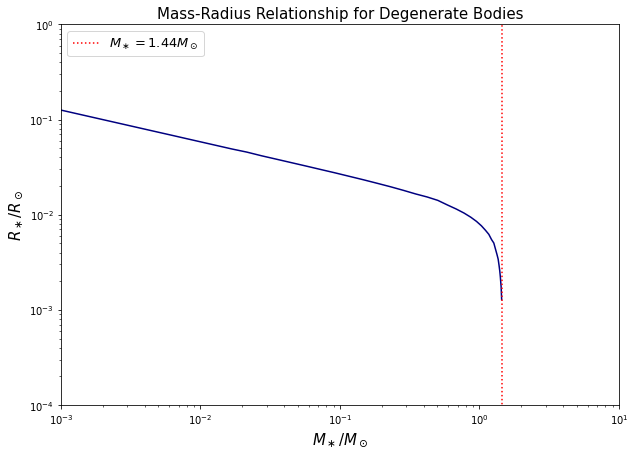

In [28]:
final_index = np.where(M_phys > 1.44)[0][0]

plt.rcParams["figure.figsize"] = [10, 7]
plt.plot(M_phys[:final_index+1],R_phys[:final_index+1], color='navy')
plt.plot([1.44,1.44],[1e-5,1e1],':', color='red',label=r'$M_\ast=1.44M_\odot$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1e1])
plt.ylim([1e-4,1e0])
plt.xlabel(r'$M_\ast/M_\odot$', fontsize=15)
plt.ylabel(r'$R_\ast/R_\odot$', fontsize=15)
plt.title('Mass-Radius Relationship for Degenerate Bodies', fontsize=15)
plt.legend(fontsize=13)
plt.show()

C:\Users\sebas\AppData\Local\Temp/ipykernel_24268/2580697660.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  return -1*M*pow(x, 3)/f_prima(x)/pow(xi, 2)


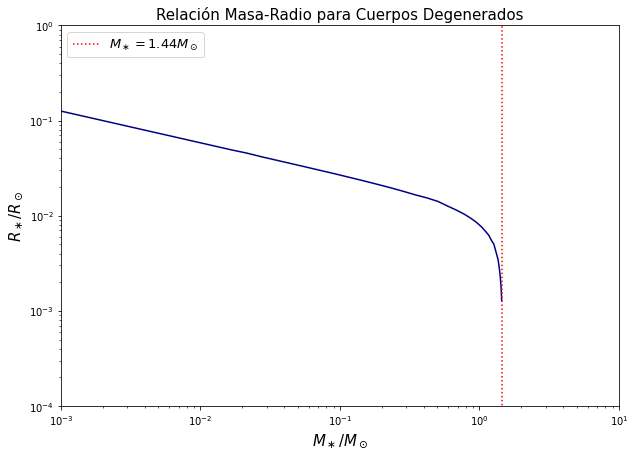

In [29]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Definir funciones
def f_prima(x):
    mi_raiz = np.sqrt(1 + pow(x,2))
    resultado = (6*pow(x,2) - 3)*mi_raiz + pow(x, 2)*(2*pow(x, 2) - 3)/mi_raiz \
    + 3/(x + mi_raiz)*(1 + x/mi_raiz)
    return resultado

def dM_dxi(x, xi):
    return 4*np.pi*pow(xi, 2)*pow(x, 3)

def dx_dxi(M, x, xi):
    return -1*M*pow(x, 3)/f_prima(x)/pow(xi, 2)

# Parámetros iniciales
xi_inicial = 1e-4
paso_xi = 1e-3
factor_refinamiento = 0.75 # factor de refinamiento
limite_refinamiento = 1e-2
max_frac_var = 2e-2 # cambio fraccional máximo
limite_M_estrella = 1e-4 # se usará para encontrar la masa de la estrella
conjeturas_x = np.logspace(-2, 1.5) # para Runge-Kutta
resultados_xi = []
resultados_M = []
M_sol = 1.9891e33 # [g]
R_sol = 6.9598e10 # [cm]
M_h = 1.6736e-24 # [g]
M_e = 9.1094e-28 # [g]
Mu_e = 2
H = 6.6261e-27 # [erg s]
C = 2.9979e10 # [cm s^-1]
P_o = 6.003e22 # [dyn cm^-2]
G = 6.6726e-8 # [dyn cm^2 g^-2]
rho_o = (8.0*np.pi/3.0)*pow((M_e*C/H),3)*(Mu_e*M_h) # [g cm^-3]
R_o = np.sqrt(P_o/rho_o)/np.sqrt(G*rho_o) # [cm]

# Cálculo de resultados
for conjetura_x in conjeturas_x:
    xi_actual = xi_inicial # comenzar muy cerca de 0, pero no en 0
    x_actual = conjetura_x
    M_actual = 0
    
    while x_actual > limite_M_estrella:
        paso_actual_xi = paso_xi
        
        # Runge Kutta de 2do orden
        prueba_dx = paso_actual_xi*dx_dxi(M_actual, x_actual, xi_actual)
        dx = paso_actual_xi*dx_dxi(M_actual, x_actual + 0.5*prueba_dx, xi_actual + 0.5*paso_actual_xi)
        dM = paso_actual_xi*dM_dxi(x_actual, xi_actual + 0.5*paso_actual_xi)
        
        # si nuestra masa varía demasiado rápido, atenuar el tamaño del paso
        while (M_actual > limite_refinamiento and abs(dM/M_actual) > max_frac_var):
            paso_actual_xi = paso_actual_xi * factor_refinamiento
            
            prueba_dx = paso_actual_xi*dx_dxi(M_actual, x_actual, xi_actual)
            dx = paso_actual_xi*dx_dxi(M_actual, x_actual + 0.5*prueba_dx, xi_actual + 0.5*paso_actual_xi)
            dM = paso_actual_xi*dM_dxi(x_actual, xi_actual + 0.5*paso_actual_xi)
        
        M_actual += dM
        x_actual += dx
        xi_actual += paso_actual_xi
        
    resultados_M.append(M_actual)
    resultados_xi.append(xi_actual)

# Convertir los resultados en resultados físicos
M_fisica = rho_o * pow(R_o,3)*np.array(resultados_M)
M_fisica /= M_sol

R_fisica = R_o * np.array(resultados_xi)
R_fisica /= R_sol

indice_final = np.where(M_fisica > 1.44)[0][0]

# Graficar los resultados
plt.rcParams["figure.figsize"] = [10, 7]
plt.plot(M_fisica[:indice_final+1],R_fisica[:indice_final+1], color='navy')
plt.plot([1.44,1.44],[1e-5,1e1],':', color='red',label=r'$M_\ast=1.44M_\odot$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1e1])
plt.ylim([1e-4,1e0])
plt.xlabel(r'$M_\ast/M_\odot$', fontsize=15)
plt.ylabel(r'$R_\ast/R_\odot$', fontsize=15)
plt.title('Relación Masa-Radio para Cuerpos Degenerados', fontsize=15)
plt.legend(fontsize=13)
plt.show()
